In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("sapimouse_ABS_dx_dy_1min.csv",header=None)

In [3]:
#get total distance
df.insert(len(df.columns)-1, 'x_distance', df.iloc[:, :128].sum(axis=1))
df.insert(len(df.columns)-1, 'y_distance', df.iloc[:, 128:256].sum(axis=1))

In [4]:
#get amount of zeros
count_zeros = lambda row: (row == 0).sum()
df.insert(len(df.columns) - 1, 'Num_Zeros', df.apply(count_zeros, axis=1))

In [5]:
#get max speed
get_max_x = lambda row: row[:128].max()
get_max_y = lambda row: row[128:256].max()
df.insert(len(df.columns) - 1, 'max_x', df.apply(get_max_x, axis=1))
df.insert(len(df.columns) - 1, 'max_y', df.apply(get_max_y, axis=1))

In [6]:
df.iloc[:, 256:261]

,x_distance,y_distance,Num_Zeros,max_x,max_y
0,777.0,671.0,53,88.0,43.0
1,533.0,586.0,43,21.0,31.0
2,2284.0,395.0,49,227.0,13.0
3,2059.0,461.0,44,127.0,23.0
4,1703.0,643.0,52,157.0,66.0
...,...,...,...,...,...
2037,2459.0,117.0,74,85.0,7.0
2038,2686.0,706.0,23,102.0,22.0
2039,719.0,801.0,49,29.0,38.0
2040,2299.0,922.0,35,71.0,40.0


In [7]:
df.columns = df.columns.astype(str)

In [8]:
#divide into train and test sets
random_state = 42
df_train,df_test=df.sample(frac=0.8,random_state=random_state),df.sample(frac=0.2,random_state=random_state)

In [33]:
df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,x_distance,y_distance,Num_Zeros,max_x,max_y,256
0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,7.0,5.0,7.0,4.0,777.0,671.0,53,88.0,43.0,55
1,3.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,...,2.0,2.0,4.0,3.0,533.0,586.0,43,21.0,31.0,55
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,5.0,4.0,2284.0,395.0,49,227.0,13.0,55
3,2.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,5.0,4.0,2059.0,461.0,44,127.0,23.0,55
4,34.0,11.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,3.0,...,0.0,0.0,0.0,1.0,1703.0,643.0,52,157.0,66.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,57.0,67.0,72.0,72.0,85.0,62.0,80.0,54.0,55.0,60.0,...,0.0,0.0,1.0,2.0,2459.0,117.0,74,85.0,7.0,84
2038,3.0,2.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,2686.0,706.0,23,102.0,22.0,84
2039,3.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,0.0,2.0,...,7.0,6.0,10.0,10.0,719.0,801.0,49,29.0,38.0,84
2040,15.0,19.0,19.0,24.0,22.0,20.0,23.0,21.0,21.0,15.0,...,0.0,0.0,0.0,1.0,2299.0,922.0,35,71.0,40.0,84


In [10]:
#divide non type and type
#df_train_x=df_train.iloc[:, :261]
#df_train_y=df_train.iloc[:, -1]
#df_test_x=df_test.iloc[:, :261]
#df_test_y=df_test.iloc[:, -1]
df_train_x=df_train.iloc[:, 256:261]
df_train_y=df_train.iloc[:, -1]
df_test_x=df_test.iloc[:, 256:261]
df_test_y=df_test.iloc[:, -1]

In [11]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [12]:
models = [RandomForestClassifier(), 
          DecisionTreeClassifier(),
          SVC(),
          KNeighborsClassifier(),
          MLPClassifier()]
models_str = ['RandomForestClassifier',
              'DecisionTreeClassifier',
             'SVC',
             'KNeighborsClassifier',
             'MLPClassifier']

In [13]:
accuracies_y = []
estimators_x = range(1,9) #range of estimators
for n in estimators_x:
    print(n)
    i=0
    temp=[]
    for m in models:
        print(models_str[i])
        i+=1
        bagging_model = BaggingClassifier(base_estimator=m, n_estimators=n, random_state=random_state)
        bagging_model.fit(df_train_x, df_train_y)
        y_pred = bagging_model.predict(df_test_x)
        temp.append(round(accuracy_score(df_test_y, y_pred),2))
    accuracies_y.append(temp)

1
RandomForestClassifier
DecisionTreeClassifier
SVC
KNeighborsClassifier
MLPClassifier
2
RandomForestClassifier
DecisionTreeClassifier
SVC
KNeighborsClassifier
MLPClassifier
3
RandomForestClassifier
DecisionTreeClassifier
SVC
KNeighborsClassifier
MLPClassifier
4
RandomForestClassifier
DecisionTreeClassifier
SVC
KNeighborsClassifier
MLPClassifier
5
RandomForestClassifier
DecisionTreeClassifier
SVC
KNeighborsClassifier
MLPClassifier
6
RandomForestClassifier
DecisionTreeClassifier
SVC
KNeighborsClassifier
MLPClassifier
7
RandomForestClassifier
DecisionTreeClassifier
SVC
KNeighborsClassifier
MLPClassifier
8
RandomForestClassifier
DecisionTreeClassifier
SVC
KNeighborsClassifier
MLPClassifier


In [14]:
accuracies_y

[[0.67, 0.67, 0.04, 0.26, 0.05],
 [0.86, 0.66, 0.04, 0.27, 0.08],
 [0.92, 0.79, 0.05, 0.33, 0.07],
 [0.96, 0.88, 0.05, 0.34, 0.1],
 [0.96, 0.9, 0.05, 0.36, 0.11],
 [0.98, 0.95, 0.07, 0.38, 0.1],
 [0.99, 0.96, 0.04, 0.38, 0.11],
 [0.98, 0.99, 0.05, 0.39, 0.12]]

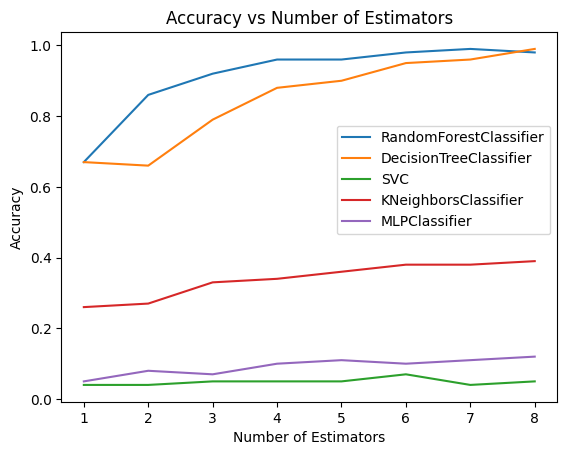

In [30]:
plt.plot(estimators_x, accuracies_y, label=models_str)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.legend(loc='center right', bbox_to_anchor=(1, 0.6))